In [1]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

In [2]:
img=cv2.imread('C:/Users/bhudi/Desktop/New folder/git/Untitled Folder/dataset/train/drums/006.jpg')

In [3]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

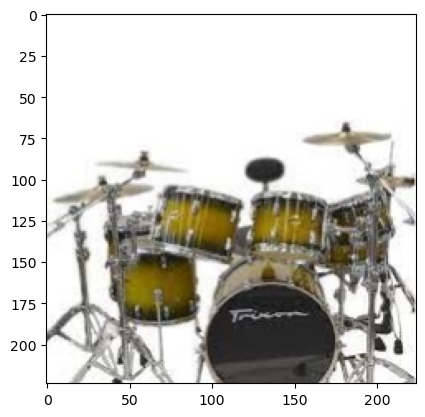

In [4]:
plt.imshow(img)

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:/Users/bhudi/Desktop/New folder/git/Untitled Folder/dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4793 images belonging to 30 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/bhudi/Desktop/New folder/git/Untitled Folder/dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 150 images belonging to 30 classes.


In [7]:
base_model=keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=(64,64,3))

In [8]:
base_model.trainable = False

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(2048,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(2048,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(30,activation='softmax',kernel_initializer='glorot_normal'))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 30)                6

In [12]:
model.fit(x=training_set,validation_data=test_set,epochs=100)

Epoch 1/100
150/150 [==============================] - 57s 372ms/step - loss: 2.2865 - accuracy: 0.3883 - val_loss: 0.8265 - val_accuracy: 0.7400
Epoch 2/100
150/150 [==============================] - 58s 387ms/step - loss: 1.5527 - accuracy: 0.5539 - val_loss: 0.6573 - val_accuracy: 0.8067
Epoch 3/100
150/150 [==============================] - 58s 388ms/step - loss: 1.3627 - accuracy: 0.6050 - val_loss: 0.6146 - val_accuracy: 0.8267
Epoch 4/100
150/150 [==============================] - 60s 397ms/step - loss: 1.2465 - accuracy: 0.6278 - val_loss: 0.5709 - val_accuracy: 0.8267
Epoch 5/100
150/150 [==============================] - 58s 390ms/step - loss: 1.1408 - accuracy: 0.6691 - val_loss: 0.5155 - val_accuracy: 0.8467
Epoch 6/100
150/150 [==============================] - 58s 389ms/step - loss: 1.0448 - accuracy: 0.6847 - val_loss: 0.5596 - val_accuracy: 0.8267
Epoch 7/100
150/150 [==============================] - 58s 383ms/step - loss: 0.9784 - accuracy: 0.7129 - val_loss: 0.5471 -

In [21]:
import numpy as np
from keras.preprocessing import image

In [14]:
test_img=image.load_img('C:/Users/bhudi/Downloads/reno-laithienne-MGfDE60G0-M-unsplash.jpg',target_size=(64,64))
test_img=image.img_to_array(test_img)
test_img = test_img / 255.0 
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
res=np.argmax(result, axis=1)
print(res[0])

1/1 [==============================] - 0s 250ms/step
15


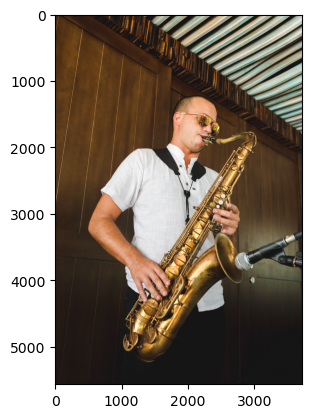

In [25]:
test_img=cv2.imread('C:/Users/bhudi/Downloads/tholaal-mohamed-Cml7eX1V5Mc-unsplash.jpg')
test_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

In [26]:
training_set.class_indices

{'Didgeridoo': 0,
 'Tambourine': 1,
 'Xylophone': 2,
 'acordian': 3,
 'alphorn': 4,
 'bagpipes': 5,
 'banjo': 6,
 'bongo drum': 7,
 'casaba': 8,
 'castanets': 9,
 'clarinet': 10,
 'clavichord': 11,
 'concertina': 12,
 'drums': 13,
 'dulcimer': 14,
 'flute': 15,
 'guiro': 16,
 'guitar': 17,
 'harmonica': 18,
 'harp': 19,
 'marakas': 20,
 'ocarina': 21,
 'piano': 22,
 'saxaphone': 23,
 'sitar': 24,
 'steel drum': 25,
 'trombone': 26,
 'trumpet': 27,
 'tuba': 28,
 'violin': 29}

In [27]:
if res[0]==1:
    prediction='Tambourine'
elif res[0]==2:
    prediction='Xylophone'
elif res[0]==3:
    prediction='Acordian'
elif res[0]==4:
    prediction='Alphorn'
elif res[0]==5:
    prediction='Bagpipes'
elif res[0]==6:
    prediction='Banjo'
elif res[0]==7:
    prediction='Bongo Drum'
elif res[0]==8:
    prediction='Casaba'
elif res[0]==9:
    prediction='Castanets'
elif res[0]==10:
    prediction='Clarinet'
elif res[0]==11:
    prediction='Clavichord'
elif res[0]==12:
    prediction='Concertina'
elif res[0]==13:
    prediction='Drums'
elif res[0]==14:
    prediction='Dulcimer'
elif res[0]==15:
    prediction='Flute'
elif res[0]==16:
    prediction='Guiro'
elif res[0]==17:
    prediction='Guitar'
elif res[0]==18:
    prediction='Harmonica'
elif res[0]==19:
    prediction='Harp'
elif res[0]==20:
    prediction='Marakas'
elif res[0]==21:
    prediction='Ocarina'
elif res[0]==22:
    prediction='Piano'
elif res[0]==23:
    prediction='Saxaphone'
elif res[0]==24:
    prediction='Sitar'
elif res[0]==25:
    prediction='Steel Drum'
elif res[0]==26:
    prediction='Trombone'
elif res[0]==27:
    prediction='Trumpet'
elif res[0]==28:
    prediction='Tuba'
elif res[0]==29:
    prediction='Violin'
else:
    prediction='Didgeridoo'

    
print(prediction)

Flute


In [28]:
model.save('cnn_instruments_classifier_50.h5')

C:\Users\bhudi\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
from keras.models import load_model
mod=load_model('cnn_instruments_classifier_50.h5')

In [31]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np

def classify_image():
    file_path = filedialog.askopenfilename()
    try:
        img = Image.open(file_path)
        img = img.resize((250, 250), Image.ANTIALIAS)  
        img = ImageTk.PhotoImage(img)
        image_label.config(image=img)
        image_label.image = img
        
        test_img = image.load_img(file_path, target_size=(64, 64))
        test_img = image.img_to_array(test_img)
        test_img = np.expand_dims(test_img, axis=0)
        
        result = mod.predict(test_img)
        res=np.argmax(result, axis=1)
        
        if np.any(res[0]==1):
            prediction_label.config(text='Prediction: Tambourine')
        elif np.any(res[0]==2):
            prediction_label.config(text='Prediction: Xylophone')
        elif np.any(res[0]==3):
            prediction_label.config(text='Prediction: Acordian')
        elif np.any(res[0]==4):
            prediction_label.config(text='Prediction: Alphorn')
        elif np.any(res[0]==5):
            prediction_label.config(text='Prediction: Bagpipes')
        elif np.any(res[0]==6):
            prediction_label.config(text='Prediction: Banjo')
        elif np.any(res[0]==7):
            prediction_label.config(text='Prediction: Bongo Drum')
        elif np.any(res[0]==8):
            prediction_label.config(text='Prediction: Casaba')
        elif np.any(res[0]==9):
            prediction_label.config(text='Prediction: Castanets')
        elif np.any(res[0]==10):
            prediction_label.config(text='Prediction: Clarinet')
        elif np.any(res[0]==11):
            prediction_label.config(text='Prediction: Clavichord')
        elif np.any(res[0]==12):
            prediction_label.config(text='Prediction: Concertina')
        elif np.any(res[0]==13):
            prediction_label.config(text='Prediction: Drums')
        elif np.any(res[0]==14):
            prediction_label.config(text='Prediction: Dulcimer')
        elif np.any(res[0]==15):
            prediction_label.config(text='Prediction: Flute')
        elif np.any(res[0]==16):
            prediction_label.config(text='Prediction: Guiro')
        elif np.any(res[0]==17):
            prediction_label.config(text='Prediction: Guitar')
        elif np.any(res[0]==18):
            prediction_label.config(text='Prediction: Harmonica')
        elif np.any(res[0]==19):
            prediction_label.config(text='Prediction: Harp')
        elif np.any(res[0]==20):
            prediction_label.config(text='Prediction: Marakas')
        elif np.any(res[0]==21):
            prediction_label.config(text='Prediction: Ocrina')
        elif np.any(res[0]==22):
            prediction_label.config(text='Prediction: Piano')
        elif np.any(res[0]==23):
            prediction_label.config(text='Prediction: Saxaphone')
        elif np.any(res[0]==24):
            prediction_label.config(text='Prediction: Sitar')
        elif np.any(res[0]==25):
            prediction_label.config(text='Prediction: Steel Drum')
        elif np.any(res[0]==26):
            prediction_label.config(text='Prediction: Trombone')
        elif np.any(res[0]==27):
            prediction_label.config(text='Prediction: Trumpet')
        elif np.any(res[0]==28):
            prediction_label.config(text='Prediction: Tuba')
        elif np.any(res[0]==29):
            prediction_label.config(text='Prediction: Violin')
        else:
            prediction_label.config(text='Prediction: Didgeridoo')
    except Exception as e:
        messagebox.showerror('Error', str(e))

root = tk.Tk()
root.title('Instrument Image Classifier')

root.configure(bg='#f0f0f0')  
button_bg = '#4caf50'  

upload_button = tk.Button(root, text='Upload Image', command=classify_image, bg=button_bg, fg='white', font=('Arial', 14))
upload_button.pack(pady=20)

image_label = tk.Label(root, bg='#ffffff', width=950, height=550)
image_label.pack()

prediction_label = tk.Label(root, text='Prediction: ', bg='#f0f0f0', font=('Arial', 16))
prediction_label.pack(pady=20)

root.mainloop()

C:\Users\bhudi\AppData\Local\Temp\ipykernel_6016\342423630.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((250, 250), Image.ANTIALIAS)


1/1 [==============================] - 0s 31ms/step
